# Example step by step DLC

First create the project

In [1]:
import os

os.system("module load cuDNN/8.1.1.33-CUDA-11.2.1")
os.system("module list")


No modules loaded


0

In [2]:
os.environ["LD_LIBRARY_PATH"] = "/camp/home/blota/.conda/envs/dlc_nogui/lib/"
print(os.environ["LD_LIBRARY_PATH"])


/camp/home/blota/.conda/envs/dlc_nogui/lib/


In [3]:
import tensorflow

print(tensorflow.__version__)


2023-01-24 23:12:47.744197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-24 23:13:01.157307: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /camp/home/blota/.conda/envs/dlc_nogui/lib/
2023-01-24 23:13:01.157468: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /camp/home/blota/.conda/envs/dlc_nogui/lib/
2023-01-24 23:13:01.157478: W tens

2.11.0


In [4]:
from tensorflow.python.client import device_lib


def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]


print(get_available_devices())


['/device:CPU:0']


2023-01-24 23:13:16.143232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-24 23:13:16.705573: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /camp/home/blota/.conda/envs/dlc_nogui/lib/
2023-01-24 23:13:16.705642: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platf

In [5]:
import deeplabcut
from pathlib import Path

config = Path("/camp/lab/znamenskiyp/home/shared/projects/DLC_models/")
config /= "all_eyes_2023/config.yaml"

print(config)


Loading DLC 2.2.3...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
/camp/lab/znamenskiyp/home/shared/projects/DLC_models/all_eyes_2023/config.yaml


/camp/home/blota/.conda/envs/dlc_nogui/lib/python3.8/site-packages/deeplabcut/__init__.py:81: UserWarning: 
        As PyTorch is not installed, unsupervised identity learning will not be available.
        Please run `pip install torch`, or ignore this warning.
        
  warnings.warn(


In [6]:
import flexiznam as flm

project = "hey2_3d-vision_foodres_20220101"
flm_sess = flm.get_flexilims_session(project_id=project)


In [7]:
# get a list of videos to add
session_dict = {
    "PZAH6.4b": ["S20220506", "S20220526"],
    "PZAG3.4f": ["S20220421", "S20220517"],
}
from flexiznam.schema import Dataset
import shutil
tmp_folder = Path('/nemo/lab/znamenskiyp/home/shared/projects/DLC_models/tmp')
tmp_folder.mkdir(exist_ok=True)
vids = []

for mouse, sessions in session_dict.items():
    for sess in sessions:
        fl_sess = flm.get_entity(name=f"{mouse}_{sess}", flexilims_session=flm_sess)
        recs = flm.get_children(
            parent_id=fl_sess["id"],
            children_datatype="recording",
            flexilims_session=flm_sess,
        )
        recs = [r for n, r in recs.iterrows() if "Spheres" in n]
        rec = recs[0]
        ds = flm.get_children(
            parent_id=rec["id"], flexilims_session=flm_sess, children_datatype="dataset"
        )
        eye_ds = [r for n, r in ds.iterrows() if "eye_camera" in n]
        for ds in eye_ds:
            ds = Dataset.from_flexilims(data_series=ds)
            vid = ds.path_full / ds.extra_attributes['video_file']
            target = tmp_folder / f"{mouse}_{sess}_{rec.name}_{vid.name}"
            if not target.exists():
                shutil.copy(vid, target)
            vids.append(target)

In [8]:
vids

[PosixPath('/nemo/lab/znamenskiyp/home/shared/projects/DLC_models/tmp/PZAH6.4b_S20220506_PZAH6.4b_S20220506_R120732_SpheresPermTubeReward_left_eye_camera_data.mp4'),
 PosixPath('/nemo/lab/znamenskiyp/home/shared/projects/DLC_models/tmp/PZAH6.4b_S20220506_PZAH6.4b_S20220506_R120732_SpheresPermTubeReward_right_eye_camera_data.mp4'),
 PosixPath('/nemo/lab/znamenskiyp/home/shared/projects/DLC_models/tmp/PZAH6.4b_S20220526_PZAH6.4b_S20220526_R184428_SpheresPermTubeReward_right_eye_camera_data.mp4'),
 PosixPath('/nemo/lab/znamenskiyp/home/shared/projects/DLC_models/tmp/PZAH6.4b_S20220526_PZAH6.4b_S20220526_R184428_SpheresPermTubeReward_left_eye_camera_data.mp4'),
 PosixPath('/nemo/lab/znamenskiyp/home/shared/projects/DLC_models/tmp/PZAG3.4f_S20220421_PZAG3.4f_S20220421_R165922_SpheresPermTubeReward_right_eye_camera_data.avi'),
 PosixPath('/nemo/lab/znamenskiyp/home/shared/projects/DLC_models/tmp/PZAG3.4f_S20220421_PZAG3.4f_S20220421_R165922_SpheresPermTubeReward_left_eye_camera_data.mp4'),
 

In [9]:
# add these videos (do it only once)
if False:
    deeplabcut.add_new_videos(config, videos=vids, extract_frames=True, copy_videos=True)


In [10]:
deeplabcut.extract_frames(config=config, userfeedback=False)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 264.75  seconds.
Extracting and downsampling... 15867  frames from the video.


15867it [00:06, 2557.73it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 222.74  seconds.
Extracting and downsampling... 13349  frames from the video.


13349it [00:05, 2626.23it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 319.88  seconds.
Extracting and downsampling... 19148  frames from the video.


19148it [00:09, 2072.44it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 281.8  seconds.
Extracting and downsampling... 16861  frames from the video.


16861it [00:08, 2052.78it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 155.37  seconds.
Extracting and downsampling... 9296  frames from the video.


9296it [00:04, 2175.43it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 5030.11  seconds.
Extracting and downsampling... 150904  frames from the video.


150904it [27:19, 92.05it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 5030.11  seconds.
Extracting and downsampling... 150904  frames from the video.


150904it [27:13, 92.36it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 2024.07  seconds.
Extracting and downsampling... 60723  frames from the video.


60723it [10:56, 92.46it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 2024.07  seconds.
Extracting and downsampling... 60723  frames from the video.


60723it [11:03, 91.52it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 2162.51  seconds.
Extracting and downsampling... 64876  frames from the video.


64876it [11:45, 91.95it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 2162.51  seconds.
Extracting and downsampling... 64876  frames from the video.


64876it [11:49, 91.39it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 2683.59  seconds.
Extracting and downsampling... 80508  frames from the video.


80508it [14:37, 91.73it/s]


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 2683.59  seconds.
Extracting and downsampling... 80508  frames from the video.


80508it [14:39, 91.50it/s]


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


Edit config file manually to add the skeleton and body parts you want. Then head to the
VM to label manually. Copy the labelled data back to camp and edit config.yaml to change
paths if needed.

Then check labels

In [4]:
deeplabcut.check_labels(config, visualizeindividuals=True)


Creating images with labels by Antonin Blot.


100%|██████████| 19/19 [00:00<00:00, 43.06it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [5]:
deeplabcut.create_training_dataset(config, augmenter_type="imgaug")


The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([ 4, 28, 29, 33, 34, 25, 10, 22, 11, 27, 18, 15,  2, 38, 20, 36, 16,
          35,  8, 13,  5, 17, 14, 32,  7, 31,  1, 26, 12, 30, 24,  6, 23, 21,
          19,  9, 37]),
   array([3, 0])))]

Now train the network (unsing the sbatch script)

Running  DLC_resnet50_eye_trackingDec1shuffle1_1030000  with # of training iterations: 1030000


/camp/home/blota/.conda/envs/dlc_nogui/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2022-12-06 13:14:54.497433: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


Running evaluation ...


39it [00:03, 11.77it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1030000
Results for 1030000  training iterations: 95 1 train error: 0.8 pixels. Test error: 2.55  pixels.
With pcutoff of 0.6  train error: 0.8 pixels. Test error: 2.55 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 39/39 [00:04<00:00,  8.76it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


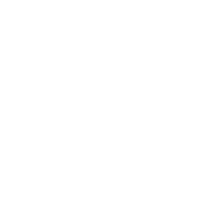

In [7]:
o = deeplabcut.evaluate_network(config, Shuffles=[1], plotting=True)


In [10]:
scm = deeplabcut.extract_save_all_maps(config, shuffle=1, Indices=[0, 5])


/camp/home/blota/.conda/envs/dlc_nogui/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Analyzing data...


2it [00:00,  5.79it/s]


Saving plots...


100%|██████████| 2/2 [00:00<00:00,  3.00it/s]
